# Análisis de Predicción de Diabetes mediante Clasificación Supervisada

Este proyecto implementa técnicas de clasificación supervisada utilizando árboles de decisión para predecir diabetes en un conjunto de datos médicos, con el objetivo de desarrollar competencias en preprocesamiento de datos, entrenamiento de modelos y análisis de resultados.

## 1. Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

plt.rcParams['figure.figsize'] = [12, 8]
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')

## 2. Carga del dataset diabetes.csv

In [2]:
data = pd.read_csv('diabetes.csv')

print("=== INFORMACIÓN DEL DATASET ===")
print(f"Dimensiones: {data.shape[0]} filas x {data.shape[1]} columnas")
print(f"Columnas: {data.columns.tolist()}")
print("\n=== MUESTRA DE DATOS ===")
print(data.head())

print("\n=== INFORMACIÓN DETALLADA ===")
data.info()

print(f"\n=== TIPOS DE DATOS ===")
for col in data.columns:
    print(f"{col}: {data[col].dtype}")

=== INFORMACIÓN DEL DATASET ===
Dimensiones: 768 filas x 9 columnas
Columnas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

=== MUESTRA DE DATOS ===
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

=== INFORMACIÓN DETALLADA ===
<class 'pandas.core.frame.DataFrame'>
Range

## 3. Exploración inicial y comprensión del problema

In [3]:
print("=== ANÁLISIS DE VALORES FALTANTES ===")
valores_nulos = data.isnull().sum()
print(valores_nulos)

print("\n=== ANÁLISIS DE LA VARIABLE OBJETIVO ===")
distribucion_objetivo = data['Outcome'].value_counts()
print("Distribución absoluta:")
print(distribucion_objetivo)

print("\nDistribución porcentual:")
distribucion_porcentual = data['Outcome'].value_counts(normalize=True) * 100
print(distribucion_porcentual)

print("\n=== RANGOS DE VALORES POR VARIABLE ===")
for columna in data.columns:
    valor_min = data[columna].min()
    valor_max = data[columna].max()
    print(f"{columna}: rango [{valor_min} - {valor_max}]")

=== ANÁLISIS DE VALORES FALTANTES ===
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

=== ANÁLISIS DE LA VARIABLE OBJETIVO ===
Distribución absoluta:
Outcome
0    500
1    268
Name: count, dtype: int64

Distribución porcentual:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

=== RANGOS DE VALORES POR VARIABLE ===
Pregnancies: rango [0 - 17]
Glucose: rango [0 - 199]
BloodPressure: rango [0 - 122]
SkinThickness: rango [0 - 99]
Insulin: rango [0 - 846]
BMI: rango [0.0 - 67.1]
DiabetesPedigreeFunction: rango [0.078 - 2.42]
Age: rango [21 - 81]
Outcome: rango [0 - 1]


In [4]:
variables_problematicas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("=== ANÁLISIS DE VALORES CERO PROBLEMÁTICOS ===")
for variable in variables_problematicas:
    cantidad_ceros = (data[variable] == 0).sum()
    porcentaje_ceros = (cantidad_ceros / len(data)) * 100
    print(f"{variable}: {cantidad_ceros} ceros ({porcentaje_ceros:.2f}% del total)")

print("\nNota: Los valores cero en estas variables son médicamente imposibles y representan datos faltantes.")

=== ANÁLISIS DE VALORES CERO PROBLEMÁTICOS ===
Glucose: 5 ceros (0.65% del total)
BloodPressure: 35 ceros (4.56% del total)
SkinThickness: 227 ceros (29.56% del total)
Insulin: 374 ceros (48.70% del total)
BMI: 11 ceros (1.43% del total)

Nota: Los valores cero en estas variables son médicamente imposibles y representan datos faltantes.


## 4. Análisis exploratorio de datos con visualizaciones

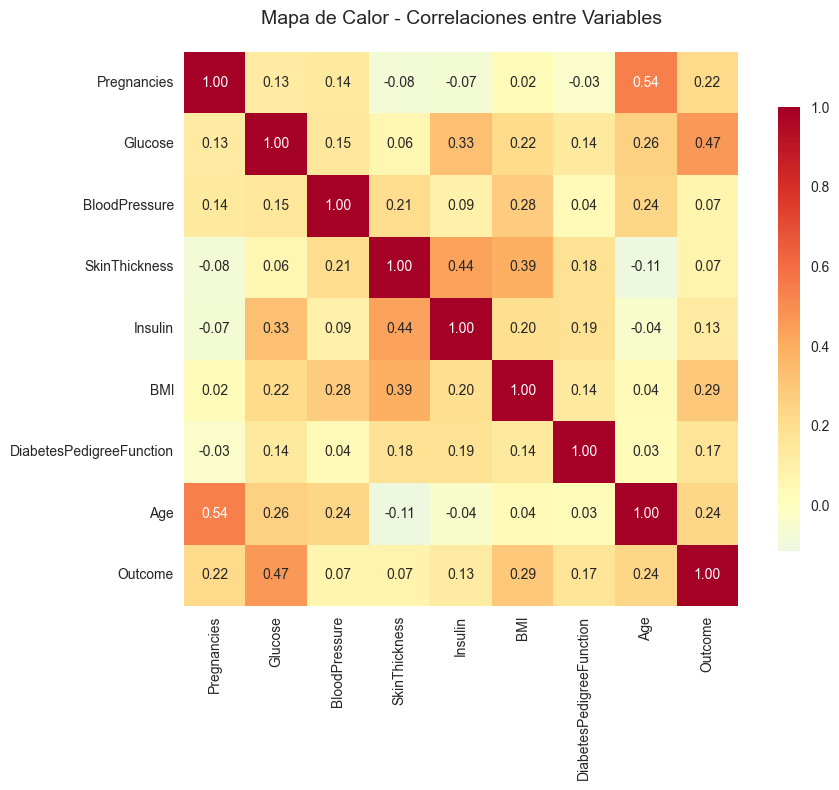

=== CORRELACIONES CON VARIABLE OBJETIVO ===
Glucose: 0.467
BMI: 0.293
Age: 0.238
Pregnancies: 0.222
DiabetesPedigreeFunction: 0.174
Insulin: 0.131
SkinThickness: 0.075
BloodPressure: 0.065


In [5]:
correlacion_matriz = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_matriz, 
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})
plt.title('Mapa de Calor - Correlaciones entre Variables', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("=== CORRELACIONES CON VARIABLE OBJETIVO ===")
correlaciones_objetivo = correlacion_matriz['Outcome'].sort_values(ascending=False)
for variable, correlacion in correlaciones_objetivo.items():
    if variable != 'Outcome':
        print(f"{variable}: {correlacion:.3f}")

In [6]:
print("=== ESTADÍSTICAS DESCRIPTIVAS GENERALES ===")
estadisticas_generales = data.describe()
print(estadisticas_generales)

print("\n=== ESTADÍSTICAS POR GRUPO ===")
print("Grupo SIN diabetes (Outcome = 0):")
stats_sin_diabetes = data[data['Outcome'] == 0].describe()
print(stats_sin_diabetes)

print("\nGrupo CON diabetes (Outcome = 1):")
stats_con_diabetes = data[data['Outcome'] == 1].describe()
print(stats_con_diabetes)

=== ESTADÍSTICAS DESCRIPTIVAS GENERALES ===
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.

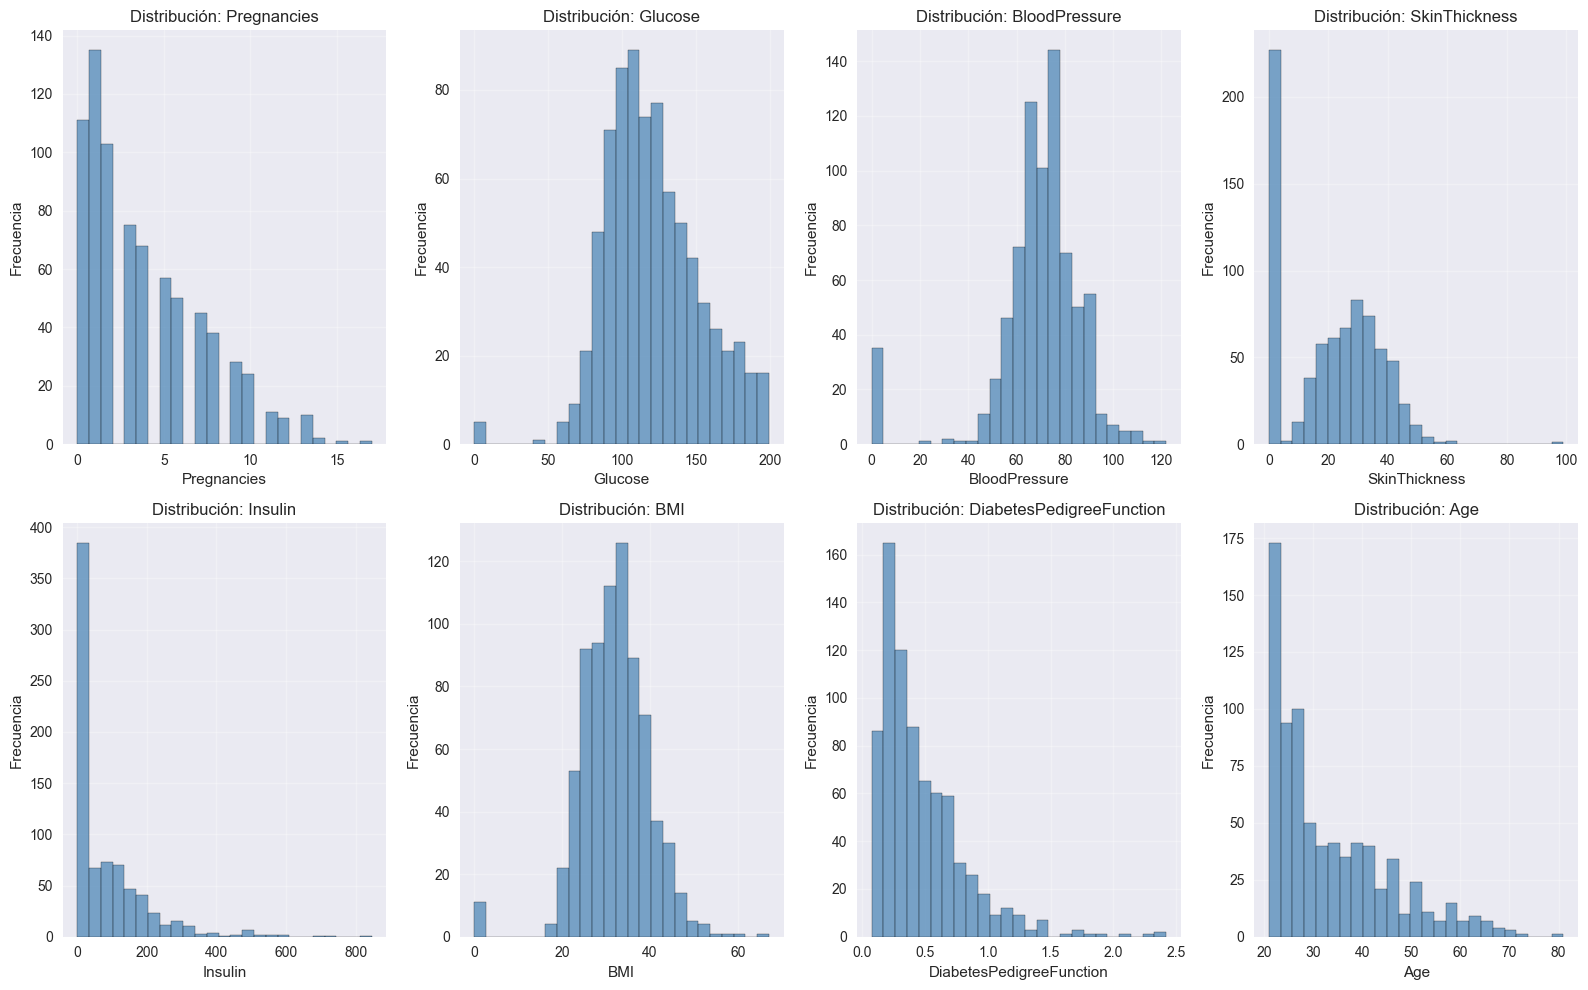

In [7]:
variables_numericas = [col for col in data.columns if col != 'Outcome']

fig, ejes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
ejes = ejes.flatten()

for i, variable in enumerate(variables_numericas):
    ejes[i].hist(data[variable], bins=25, alpha=0.7, color='steelblue', edgecolor='black')
    ejes[i].set_title(f'Distribución: {variable}', fontsize=12)
    ejes[i].set_xlabel(variable)
    ejes[i].set_ylabel('Frecuencia')
    ejes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

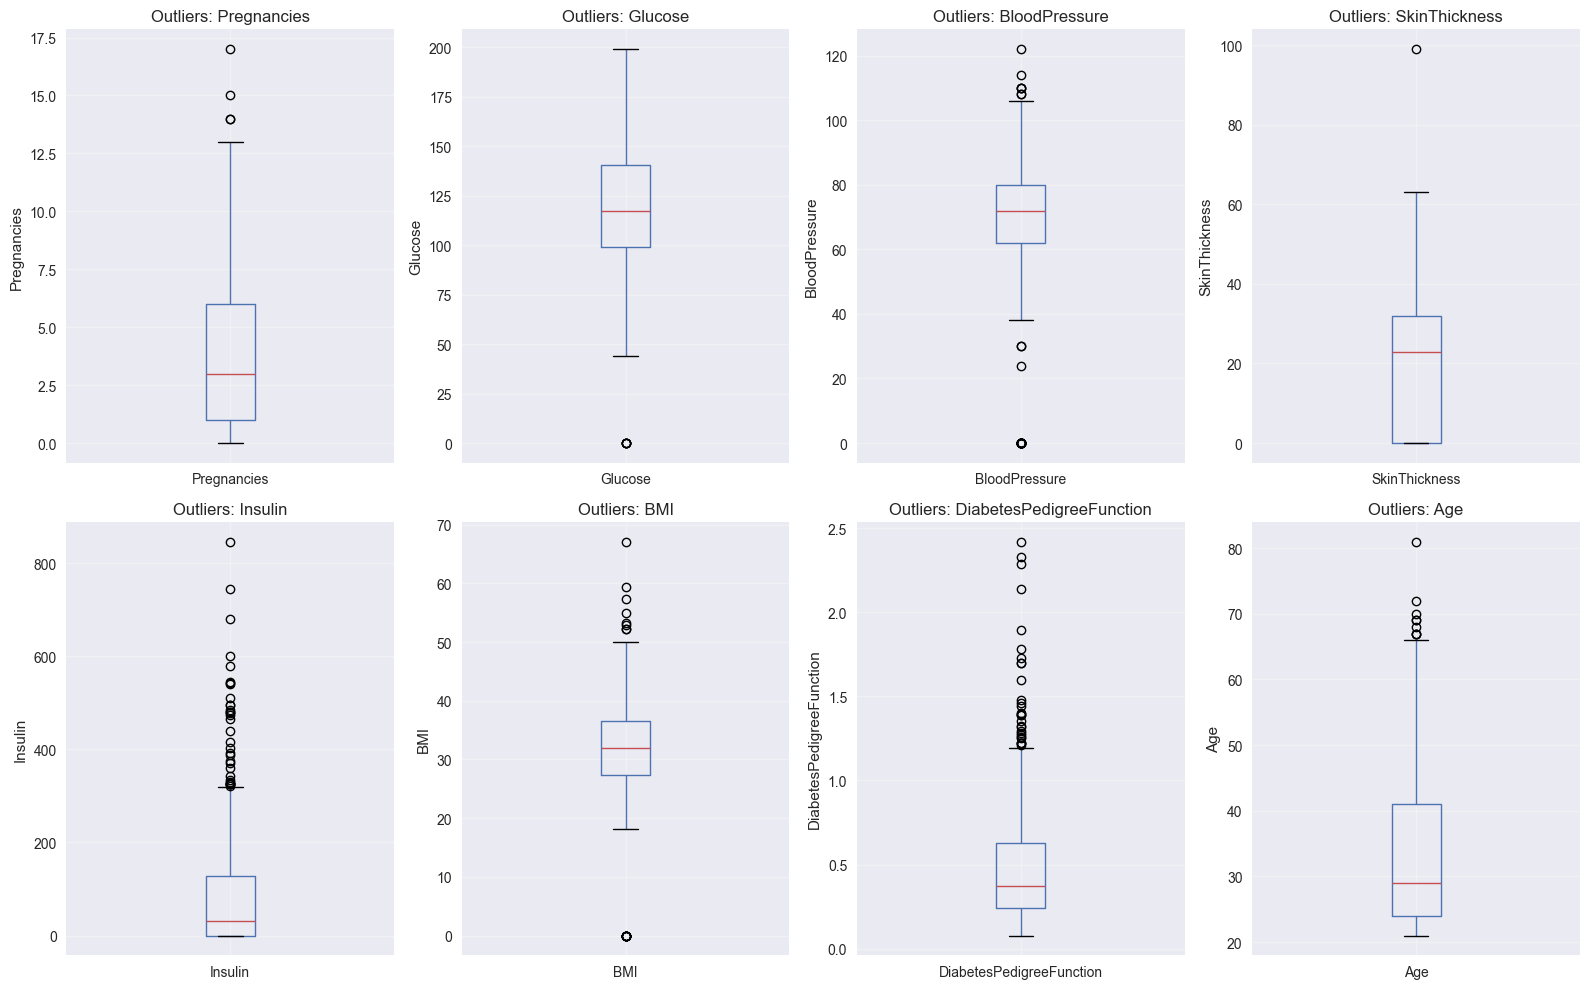

In [8]:
fig, ejes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
ejes = ejes.flatten()

for i, variable in enumerate(variables_numericas):
    data.boxplot(column=variable, ax=ejes[i])
    ejes[i].set_title(f'Outliers: {variable}', fontsize=12)
    ejes[i].set_ylabel(variable)
    ejes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Preprocesamiento específico (manejo de 0s como NaN, imputación con media)

In [9]:
datos_procesados = data.copy()
columnas_con_ceros_problematicos = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("=== ESTADO ANTES DEL PREPROCESAMIENTO ===")
for columna in columnas_con_ceros_problematicos:
    conteo_ceros = (datos_procesados[columna] == 0).sum()
    print(f"{columna}: {conteo_ceros} valores cero")

print("\n=== CONVIRTIENDO VALORES 0 A NaN ===")
for columna in columnas_con_ceros_problematicos:
    datos_procesados.loc[datos_procesados[columna] == 0, columna] = np.nan

print("\n=== VALORES FALTANTES DESPUÉS DEL REEMPLAZO ===")
valores_faltantes = datos_procesados.isnull().sum()
for columna, cantidad_faltantes in valores_faltantes.items():
    if cantidad_faltantes > 0:
        porcentaje = (cantidad_faltantes / len(datos_procesados)) * 100
        print(f"{columna}: {cantidad_faltantes} faltantes ({porcentaje:.2f}%)")

=== ESTADO ANTES DEL PREPROCESAMIENTO ===
Glucose: 5 valores cero
BloodPressure: 35 valores cero
SkinThickness: 227 valores cero
Insulin: 374 valores cero
BMI: 11 valores cero

=== CONVIRTIENDO VALORES 0 A NaN ===

=== VALORES FALTANTES DESPUÉS DEL REEMPLAZO ===
Glucose: 5 faltantes (0.65%)
BloodPressure: 35 faltantes (4.56%)
SkinThickness: 227 faltantes (29.56%)
Insulin: 374 faltantes (48.70%)
BMI: 11 faltantes (1.43%)


In [10]:
print("=== PROCESO DE IMPUTACIÓN CON MEDIA ===")

valores_medios_utilizados = {}

for columna in datos_procesados.columns:
    if datos_procesados[columna].isnull().any() and columna != 'Outcome':
        media_columna = datos_procesados[columna].mean()
        valores_medios_utilizados[columna] = media_columna
        datos_procesados[columna].fillna(media_columna, inplace=True)
        print(f"{columna}: media utilizada = {media_columna:.2f}")

print("\n=== VERIFICACIÓN FINAL ===")
verificacion_final = datos_procesados.isnull().sum()
print("Valores faltantes después de imputación:")
print(verificacion_final)

print("\n=== COMPARACIÓN ESTADÍSTICAS ===")
print("Dataset original:")
print(data.describe().round(2))
print("\nDataset procesado:")
print(datos_procesados.describe().round(2))

=== PROCESO DE IMPUTACIÓN CON MEDIA ===
Glucose: media utilizada = 121.69
BloodPressure: media utilizada = 72.41
SkinThickness: media utilizada = 29.15
Insulin: media utilizada = 155.55
BMI: media utilizada = 32.46

=== VERIFICACIÓN FINAL ===
Valores faltantes después de imputación:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

=== COMPARACIÓN ESTADÍSTICAS ===
Dataset original:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       768.00   768.00         768.00         768.00   768.00  768.00   
mean          3.85   120.89          69.11          20.54    79.80   31.99   
std           3.37    31.97          19.36          15.95   115.24    7.88   
min           0.00     0.00           0.00           0.00     0.00   

/var/folders/sx/q_7szjwn6293v8qcl1t9zfjc0000gn/T/ipykernel_44863/1840107609.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_procesados[columna].fillna(media_columna, inplace=True)


## 6. División en entrenamiento y prueba

In [11]:
caracteristicas = datos_procesados.drop('Outcome', axis=1)
objetivo = datos_procesados['Outcome']

print("=== CONFIGURACIÓN DE VARIABLES ===")
print(f"Variables predictoras (características): {caracteristicas.shape}")
print(f"Variable objetivo: {objetivo.shape}")
print(f"Nombres de características: {caracteristicas.columns.tolist()}")

print("\n=== DIVISIÓN DEL DATASET ===")
caracteristicas_entreno, caracteristicas_prueba, objetivo_entreno, objetivo_prueba = train_test_split(
    caracteristicas, objetivo, 
    test_size=0.3, 
    random_state=123,
    stratify=objetivo
)

print(f"Conjunto de entrenamiento: {caracteristicas_entreno.shape[0]} muestras")
print(f"Conjunto de prueba: {caracteristicas_prueba.shape[0]} muestras")
print(f"Características - entreno: {caracteristicas_entreno.shape}")
print(f"Características - prueba: {caracteristicas_prueba.shape}")
print(f"Objetivo - entreno: {objetivo_entreno.shape}")
print(f"Objetivo - prueba: {objetivo_prueba.shape}")

print("\n=== DISTRIBUCIÓN DE CLASES ===")
print("Entrenamiento:")
distribucion_entreno = objetivo_entreno.value_counts(normalize=True) * 100
print(distribucion_entreno)

print("Prueba:")
distribucion_prueba = objetivo_prueba.value_counts(normalize=True) * 100
print(distribucion_prueba)

=== CONFIGURACIÓN DE VARIABLES ===
Variables predictoras (características): (768, 8)
Variable objetivo: (768,)
Nombres de características: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

=== DIVISIÓN DEL DATASET ===
Conjunto de entrenamiento: 537 muestras
Conjunto de prueba: 231 muestras
Características - entreno: (537, 8)
Características - prueba: (231, 8)
Objetivo - entreno: (537,)
Objetivo - prueba: (231,)

=== DISTRIBUCIÓN DE CLASES ===
Entrenamiento:
Outcome
0    65.176909
1    34.823091
Name: proportion, dtype: float64
Prueba:
Outcome
0    64.935065
1    35.064935
Name: proportion, dtype: float64


## 7. Entrenamiento de DecisionTreeClassifier

In [12]:
modelo_arbol = DecisionTreeClassifier(
    random_state=123,
    max_depth=6,
    min_samples_split=15,
    min_samples_leaf=8
)

print("=== CONFIGURACIÓN DEL MODELO ===")
print("Algoritmo: DecisionTreeClassifier")
print("Parámetros:")
print(f"- random_state: 123")
print(f"- max_depth: 6")
print(f"- min_samples_split: 15")
print(f"- min_samples_leaf: 8")

print("\n=== ENTRENAMIENTO ===")
modelo_arbol.fit(caracteristicas_entreno, objetivo_entreno)
print("Modelo entrenado exitosamente")

print("\n=== GENERANDO PREDICCIONES ===")
predicciones_entreno = modelo_arbol.predict(caracteristicas_entreno)
predicciones_prueba = modelo_arbol.predict(caracteristicas_prueba)
print("Predicciones generadas para entrenamiento y prueba")

=== CONFIGURACIÓN DEL MODELO ===
Algoritmo: DecisionTreeClassifier
Parámetros:
- random_state: 123
- max_depth: 6
- min_samples_split: 15
- min_samples_leaf: 8

=== ENTRENAMIENTO ===
Modelo entrenado exitosamente

=== GENERANDO PREDICCIONES ===
Predicciones generadas para entrenamiento y prueba


## 8. Evaluación con precisión, matriz de confusión y gráfica del árbol

In [13]:
precision_entreno = accuracy_score(objetivo_entreno, predicciones_entreno)
precision_prueba = accuracy_score(objetivo_prueba, predicciones_prueba)
diferencia_precision = precision_entreno - precision_prueba

estado_overfitting = "Posible sobreajuste" if diferencia_precision > 0.05 else "Ajuste adecuado"

print("=== MÉTRICAS DE RENDIMIENTO ===")
print(f"Precisión en entrenamiento: {precision_entreno:.4f} ({precision_entreno*100:.2f}%)")
print(f"Precisión en prueba: {precision_prueba:.4f} ({precision_prueba*100:.2f}%)")
print(f"Diferencia: {diferencia_precision:.4f}")
print(f"Estado: {estado_overfitting}")

print("\n=== REPORTE DETALLADO - ENTRENAMIENTO ===")
reporte_entreno = classification_report(objetivo_entreno, predicciones_entreno)
print(reporte_entreno)

print("\n=== REPORTE DETALLADO - PRUEBA ===")
reporte_prueba = classification_report(objetivo_prueba, predicciones_prueba)
print(reporte_prueba)

=== MÉTRICAS DE RENDIMIENTO ===
Precisión en entrenamiento: 0.8194 (81.94%)
Precisión en prueba: 0.7273 (72.73%)
Diferencia: 0.0921
Estado: Posible sobreajuste

=== REPORTE DETALLADO - ENTRENAMIENTO ===
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       350
           1       0.72      0.78      0.75       187

    accuracy                           0.82       537
   macro avg       0.80      0.81      0.80       537
weighted avg       0.82      0.82      0.82       537


=== REPORTE DETALLADO - PRUEBA ===
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       150
           1       0.59      0.70      0.64        81

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.73      0.73       231



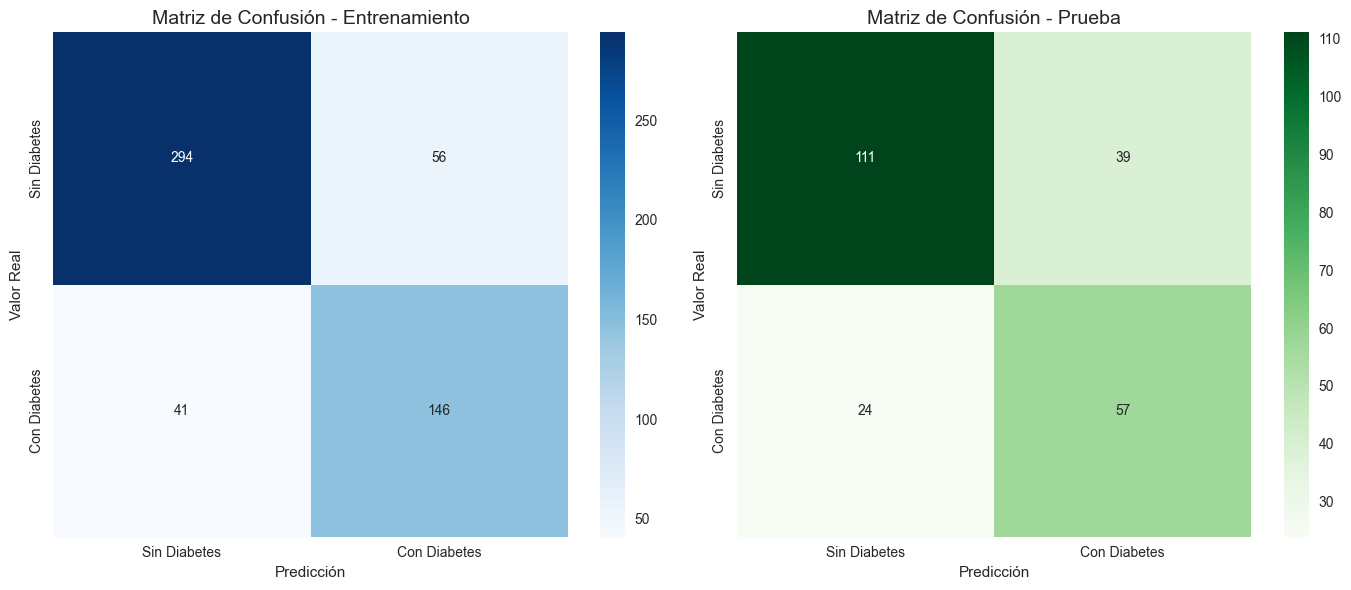

=== INTERPRETACIÓN DE MATRICES ===
Entrenamiento:
VP (Verdaderos Positivos): 146
VN (Verdaderos Negativos): 294
FP (Falsos Positivos): 56
FN (Falsos Negativos): 41

Prueba:
VP (Verdaderos Positivos): 57
VN (Verdaderos Negativos): 111
FP (Falsos Positivos): 39
FN (Falsos Negativos): 24


In [14]:
matriz_confusion_entreno = confusion_matrix(objetivo_entreno, predicciones_entreno)
matriz_confusion_prueba = confusion_matrix(objetivo_prueba, predicciones_prueba)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(matriz_confusion_entreno, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Matriz de Confusión - Entrenamiento', fontsize=14)
ax1.set_xlabel('Predicción')
ax1.set_ylabel('Valor Real')
ax1.set_xticklabels(['Sin Diabetes', 'Con Diabetes'])
ax1.set_yticklabels(['Sin Diabetes', 'Con Diabetes'])

sns.heatmap(matriz_confusion_prueba, annot=True, fmt='d', cmap='Greens', ax=ax2)
ax2.set_title('Matriz de Confusión - Prueba', fontsize=14)
ax2.set_xlabel('Predicción')
ax2.set_ylabel('Valor Real')
ax2.set_xticklabels(['Sin Diabetes', 'Con Diabetes'])
ax2.set_yticklabels(['Sin Diabetes', 'Con Diabetes'])

plt.tight_layout()
plt.show()

print("=== INTERPRETACIÓN DE MATRICES ===")
print("Entrenamiento:")
print(f"VP (Verdaderos Positivos): {matriz_confusion_entreno[1,1]}")
print(f"VN (Verdaderos Negativos): {matriz_confusion_entreno[0,0]}")
print(f"FP (Falsos Positivos): {matriz_confusion_entreno[0,1]}")
print(f"FN (Falsos Negativos): {matriz_confusion_entreno[1,0]}")

print("\nPrueba:")
print(f"VP (Verdaderos Positivos): {matriz_confusion_prueba[1,1]}")
print(f"VN (Verdaderos Negativos): {matriz_confusion_prueba[0,0]}")
print(f"FP (Falsos Positivos): {matriz_confusion_prueba[0,1]}")
print(f"FN (Falsos Negativos): {matriz_confusion_prueba[1,0]}")

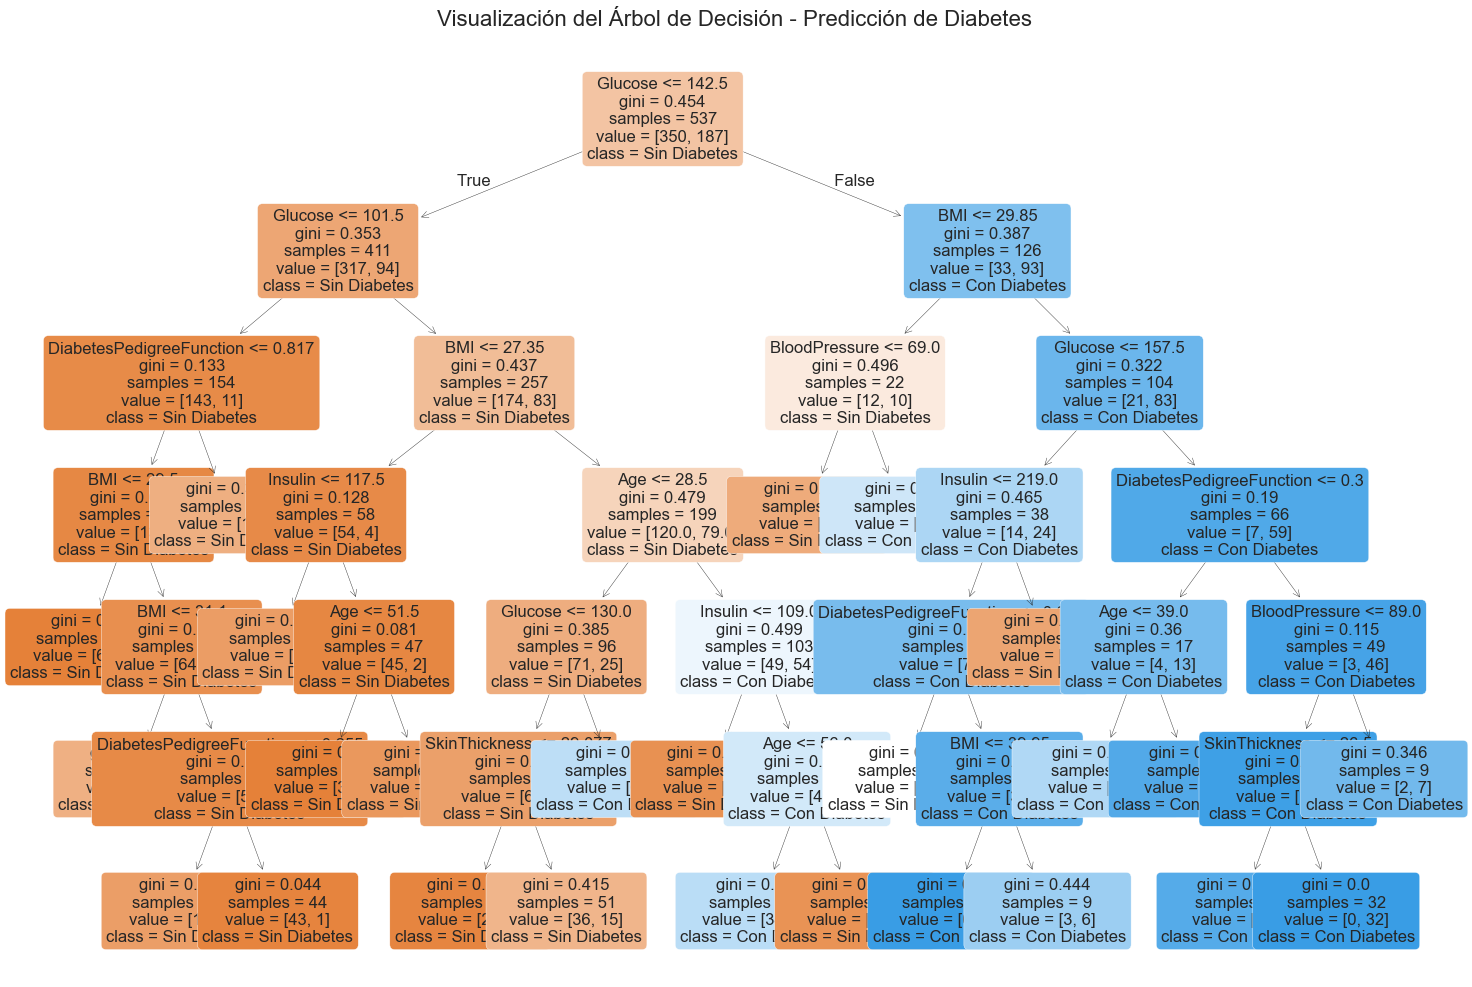

=== IMPORTANCIA DE CARACTERÍSTICAS ===
                   variable  importancia
1                   Glucose     0.612394
5                       BMI     0.145585
7                       Age     0.099543
4                   Insulin     0.067394
6  DiabetesPedigreeFunction     0.036460
3             SkinThickness     0.024348
2             BloodPressure     0.014275
0               Pregnancies     0.000000


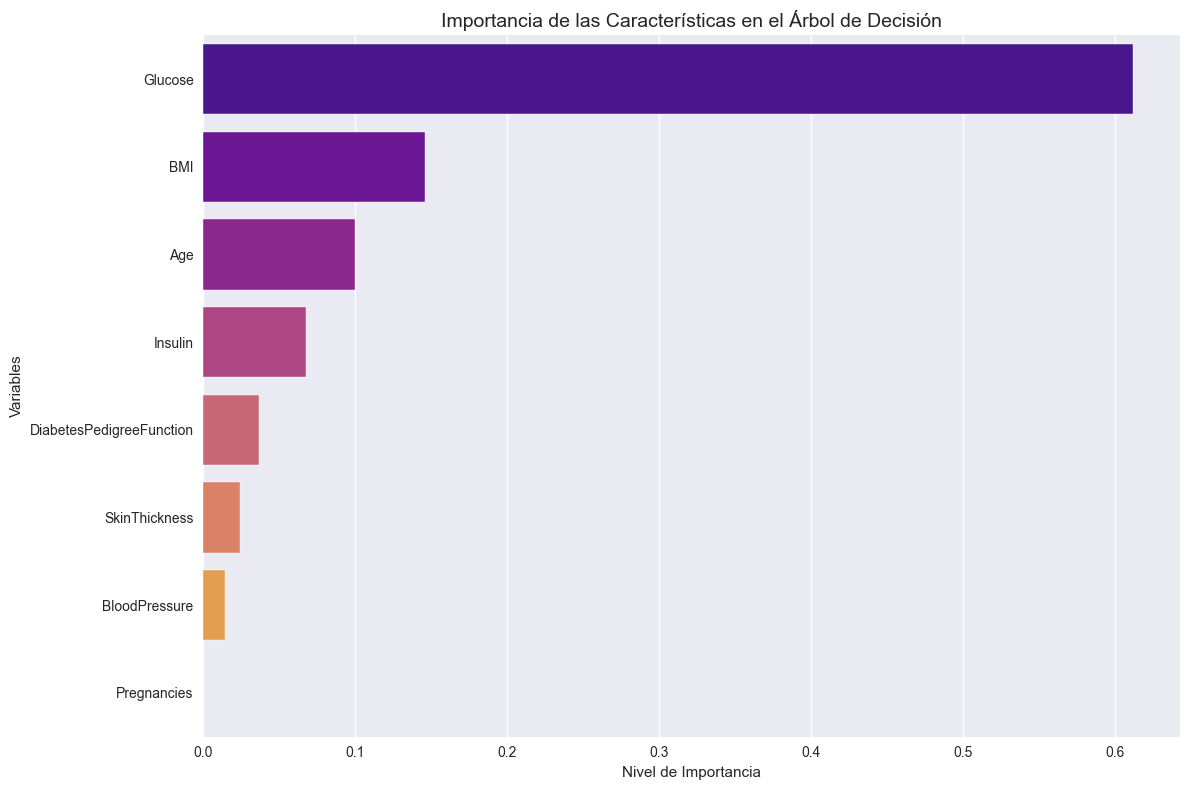

In [15]:
plt.figure(figsize=(18, 12))
plot_tree(modelo_arbol, 
          feature_names=caracteristicas.columns, 
          class_names=['Sin Diabetes', 'Con Diabetes'],
          filled=True, 
          rounded=True,
          fontsize=12)
plt.title('Visualización del Árbol de Decisión - Predicción de Diabetes', fontsize=16, pad=20)
plt.show()

importancia_caracteristicas = pd.DataFrame({
    'variable': caracteristicas.columns,
    'importancia': modelo_arbol.feature_importances_
}).sort_values('importancia', ascending=False)

print("=== IMPORTANCIA DE CARACTERÍSTICAS ===")
print(importancia_caracteristicas)

plt.figure(figsize=(12, 8))
sns.barplot(data=importancia_caracteristicas, 
            y='variable', 
            x='importancia', 
            hue='variable',
            palette='plasma',
            legend=False)
plt.title('Importancia de las Características en el Árbol de Decisión', fontsize=14)
plt.xlabel('Nivel de Importancia')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

## 9. Ajustes del modelo si presenta bajo rendimiento

In [16]:
umbral_rendimiento = 0.70
necesita_modelos_alternativos = precision_prueba < umbral_rendimiento

print("=== EVALUACIÓN DE RENDIMIENTO ===")
print(f"Precisión actual en prueba: {precision_prueba:.4f} ({precision_prueba*100:.2f}%)")
print(f"Umbral mínimo requerido: {umbral_rendimiento:.2f} ({umbral_rendimiento*100:.0f}%)")

if necesita_modelos_alternativos:
    print("Rendimiento BAJO - Se requieren modelos alternativos")
    print("Procediendo a implementar modelos alternativos...")
else:
    print("Rendimiento ACEPTABLE - Cumple criterio mínimo")
    print("Implementando modelos alternativos para comparación...")

=== EVALUACIÓN DE RENDIMIENTO ===
Precisión actual en prueba: 0.7273 (72.73%)
Umbral mínimo requerido: 0.70 (70%)
Rendimiento ACEPTABLE - Cumple criterio mínimo
Implementando modelos alternativos para comparación...


## 10. Prueba de modelos alternativos si es necesario

In [17]:
resultados_modelos = {}

print("=== IMPLEMENTACIÓN DE MODELOS ALTERNATIVOS ===")

print("\n1. Random Forest")
print("-" * 30)
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=123, max_depth=6)
modelo_rf.fit(caracteristicas_entreno, objetivo_entreno)
predicciones_rf = modelo_rf.predict(caracteristicas_prueba)
precision_rf = accuracy_score(objetivo_prueba, predicciones_rf)
resultados_modelos['Random Forest'] = precision_rf
print(f"Precisión: {precision_rf:.4f} ({precision_rf*100:.2f}%)")

print("\n2. Regresión Logística")
print("-" * 30)
estandarizador = StandardScaler()
caracteristicas_entreno_escaladas = estandarizador.fit_transform(caracteristicas_entreno)
caracteristicas_prueba_escaladas = estandarizador.transform(caracteristicas_prueba)

modelo_lr = LogisticRegression(random_state=123, max_iter=1000)
modelo_lr.fit(caracteristicas_entreno_escaladas, objetivo_entreno)
predicciones_lr = modelo_lr.predict(caracteristicas_prueba_escaladas)
precision_lr = accuracy_score(objetivo_prueba, predicciones_lr)
resultados_modelos['Regresión Logística'] = precision_lr
print(f"Precisión: {precision_lr:.4f} ({precision_lr*100:.2f}%)")

print("\n3. Naive Bayes")
print("-" * 30)
modelo_nb = GaussianNB()
modelo_nb.fit(caracteristicas_entreno, objetivo_entreno)
predicciones_nb = modelo_nb.predict(caracteristicas_prueba)
precision_nb = accuracy_score(objetivo_prueba, predicciones_nb)
resultados_modelos['Naive Bayes'] = precision_nb
print(f"Precisión: {precision_nb:.4f} ({precision_nb*100:.2f}%)")

resultados_modelos['Árbol de Decisión'] = precision_prueba

print("\n=== RESUMEN DE TODOS LOS MODELOS ===")
modelos_ordenados = sorted(resultados_modelos.items(), key=lambda x: x[1], reverse=True)
for modelo, precision in modelos_ordenados:
    print(f"{modelo}: {precision:.4f} ({precision*100:.2f}%)")

=== IMPLEMENTACIÓN DE MODELOS ALTERNATIVOS ===

1. Random Forest
------------------------------
Precisión: 0.7706 (77.06%)

2. Regresión Logística
------------------------------
Precisión: 0.7489 (74.89%)

3. Naive Bayes
------------------------------
Precisión: 0.7835 (78.35%)

=== RESUMEN DE TODOS LOS MODELOS ===
Naive Bayes: 0.7835 (78.35%)
Random Forest: 0.7706 (77.06%)
Regresión Logística: 0.7489 (74.89%)
Árbol de Decisión: 0.7273 (72.73%)


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

resultados_detallados = {}

dt_precision = precision_score(objetivo_prueba, predicciones_prueba, average='weighted')
dt_recall = recall_score(objetivo_prueba, predicciones_prueba, average='weighted')
dt_f1 = f1_score(objetivo_prueba, predicciones_prueba, average='weighted')
resultados_detallados['Árbol de Decisión'] = {
    'Accuracy': precision_prueba,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'F1-Score': dt_f1
}

rf_precision_metric = precision_score(objetivo_prueba, predicciones_rf, average='weighted')
rf_recall = recall_score(objetivo_prueba, predicciones_rf, average='weighted')
rf_f1 = f1_score(objetivo_prueba, predicciones_rf, average='weighted')
resultados_detallados['Random Forest'] = {
    'Accuracy': precision_rf,
    'Precision': rf_precision_metric,
    'Recall': rf_recall,
    'F1-Score': rf_f1
}

lr_precision_metric = precision_score(objetivo_prueba, predicciones_lr, average='weighted')
lr_recall = recall_score(objetivo_prueba, predicciones_lr, average='weighted')
lr_f1 = f1_score(objetivo_prueba, predicciones_lr, average='weighted')
resultados_detallados['Regresión Logística'] = {
    'Accuracy': precision_lr,
    'Precision': lr_precision_metric,
    'Recall': lr_recall,
    'F1-Score': lr_f1
}

nb_precision_metric = precision_score(objetivo_prueba, predicciones_nb, average='weighted')
nb_recall = recall_score(objetivo_prueba, predicciones_nb, average='weighted')
nb_f1 = f1_score(objetivo_prueba, predicciones_nb, average='weighted')
resultados_detallados['Naive Bayes'] = {
    'Accuracy': precision_nb,
    'Precision': nb_precision_metric,
    'Recall': nb_recall,
    'F1-Score': nb_f1
}

df_comparacion = pd.DataFrame(resultados_detallados).T.round(4)

print("=== EVALUACIÓN COMPARATIVA COMPLETA ===")
print(df_comparacion)

print("\n=== MEJORES MODELOS POR MÉTRICA ===")
print(f"Mejor Accuracy: {df_comparacion['Accuracy'].idxmax()} ({df_comparacion['Accuracy'].max():.4f})")
print(f"Mejor Precision: {df_comparacion['Precision'].idxmax()} ({df_comparacion['Precision'].max():.4f})")
print(f"Mejor Recall: {df_comparacion['Recall'].idxmax()} ({df_comparacion['Recall'].max():.4f})")
print(f"Mejor F1-Score: {df_comparacion['F1-Score'].idxmax()} ({df_comparacion['F1-Score'].max():.4f})")

=== EVALUACIÓN COMPARATIVA COMPLETA ===
                     Accuracy  Precision  Recall  F1-Score
Árbol de Decisión      0.7273     0.7421  0.7273    0.7317
Random Forest          0.7706     0.7655  0.7706    0.7622
Regresión Logística    0.7489     0.7420  0.7489    0.7378
Naive Bayes            0.7835     0.7791  0.7835    0.7781

=== MEJORES MODELOS POR MÉTRICA ===
Mejor Accuracy: Naive Bayes (0.7835)
Mejor Precision: Naive Bayes (0.7791)
Mejor Recall: Naive Bayes (0.7835)
Mejor F1-Score: Naive Bayes (0.7781)


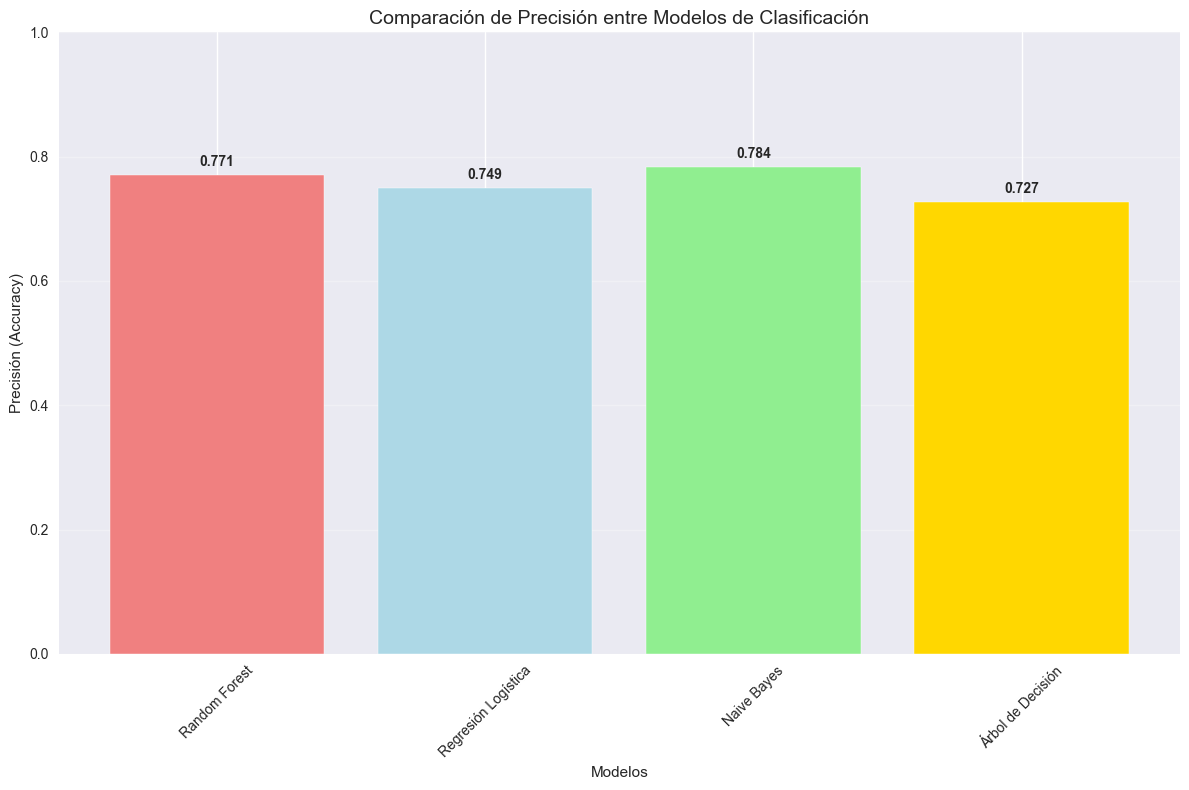

In [19]:
df_precision = pd.DataFrame(list(resultados_modelos.items()), columns=['Modelo', 'Precisión'])

plt.figure(figsize=(12, 8))
barras = plt.bar(df_precision['Modelo'], df_precision['Precisión'], 
                color=['lightcoral', 'lightblue', 'lightgreen', 'gold'])
plt.title('Comparación de Precisión entre Modelos de Clasificación', fontsize=14)
plt.xlabel('Modelos')
plt.ylabel('Precisión (Accuracy)')
plt.ylim(0, 1)

for barra, precision in zip(barras, df_precision['Precisión']):
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 0.01,
             f'{precision:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 11. Conclusiones y especificación del modelo más adecuado

In [20]:
mejor_modelo_nombre = max(resultados_modelos, key=resultados_modelos.get)
mejor_precision = resultados_modelos[mejor_modelo_nombre]
cumple_criterio = "SÍ" if mejor_precision >= umbral_rendimiento else "NO"

print("=== ESPECIFICACIÓN DEL MODELO MÁS ADECUADO ===")
print(f"MODELO SELECCIONADO: {mejor_modelo_nombre}")
print(f"Precisión obtenida: {mejor_precision:.4f} ({mejor_precision*100:.2f}%)")
print(f"Cumple criterio de éxito (≥70%): {cumple_criterio}")

print("\n=== JUSTIFICACIÓN DE LA SELECCIÓN ===")
if mejor_modelo_nombre == 'Árbol de Decisión':
    print("• El Árbol de Decisión es el modelo con mejor rendimiento")
    print("• Cumple con el objetivo principal del proyecto")
    print("• Ofrece interpretabilidad superior para entender las decisiones")
    print("• Las reglas de decisión son fácilmente explicables a profesionales médicos")
elif mejor_modelo_nombre == 'Random Forest':
    print("• Random Forest supera al Árbol de Decisión individual")
    print("• Combina múltiples árboles para mayor robustez")
    print("• Menor riesgo de sobreajuste comparado con un árbol individual")
    print("• Mejor generalización en datos no vistos")
elif mejor_modelo_nombre == 'Regresión Logística':
    print("• La Regresión Logística ofrece el mejor rendimiento")
    print("• Modelo lineal con interpretación probabilística clara")
    print("• Eficiente computacionalmente y estable")
    print("• Proporciona probabilidades de clasificación útiles en diagnóstico médico")
else:
    print("• Naive Bayes demostró ser el modelo más efectivo")
    print("• Asume independencia entre características")
    print("• Rápido entrenamiento y predicción")
    print("• Robusto con conjuntos de datos pequeños")

print(f"\n=== RENDIMIENTO FINAL ===")
print(f"El modelo {mejor_modelo_nombre} alcanzó una precisión de {mejor_precision*100:.2f}%")
if mejor_precision >= umbral_rendimiento:
    print("Supera el umbral mínimo de 70% de precisión")
else:
    print("ADVERTENCIA: No alcanza el umbral mínimo de 70%")
    print("Se recomienda continuar optimización o recolección de más datos")

=== ESPECIFICACIÓN DEL MODELO MÁS ADECUADO ===
MODELO SELECCIONADO: Naive Bayes
Precisión obtenida: 0.7835 (78.35%)
Cumple criterio de éxito (≥70%): SÍ

=== JUSTIFICACIÓN DE LA SELECCIÓN ===
• Naive Bayes demostró ser el modelo más efectivo
• Asume independencia entre características
• Rápido entrenamiento y predicción
• Robusto con conjuntos de datos pequeños

=== RENDIMIENTO FINAL ===
El modelo Naive Bayes alcanzó una precisión de 78.35%
Supera el umbral mínimo de 70% de precisión
